In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

X.shape, y.value_counts()


((569, 30),
 target
 1    357
 0    212
 Name: count, dtype: int64)

In [4]:
display(X.head())
print("Class balance:\n", y.value_counts())

# Correlation snapshot (top features correlated with target)
corr = pd.concat([X, y], axis=1).corr(numeric_only=True)['target'].sort_values(ascending=False)
corr.head(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Class balance:
 target
1    357
0    212
Name: count, dtype: int64


,target
target,1.000000
smoothness error,0.067016
mean fractal dimension,0.012838
texture error,0.008303
symmetry error,0.006522
fractal dimension error,-0.077972
concavity error,-0.253730
compactness error,-0.292999
worst fractal dimension,-0.323872
mean symmetry,-0.330499


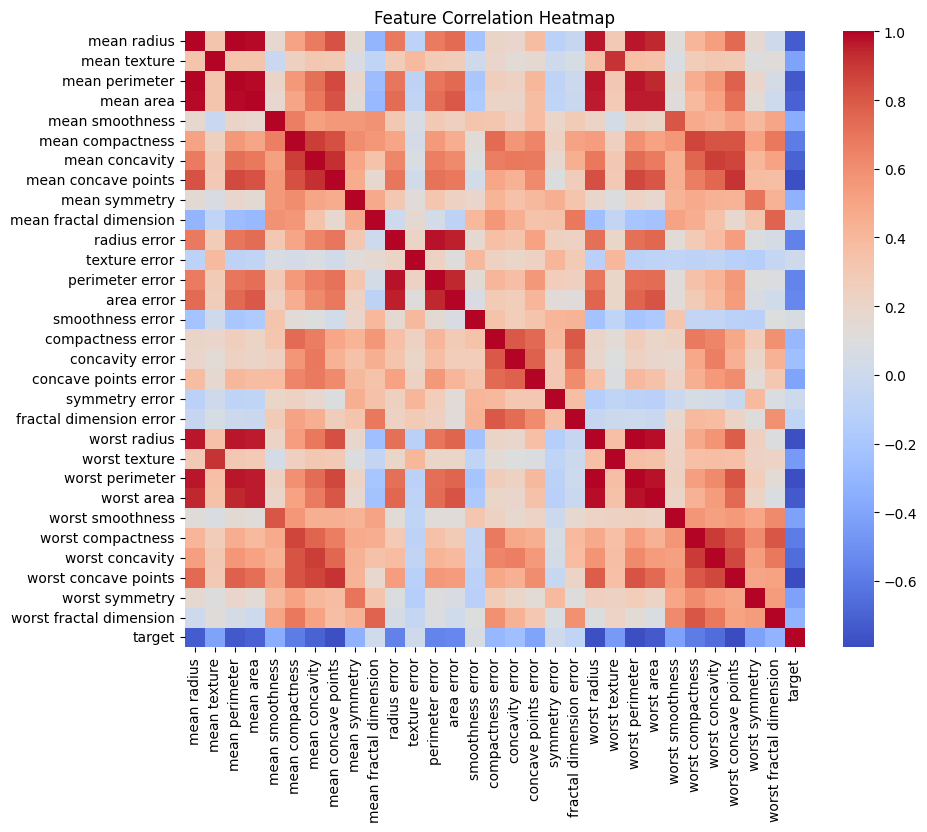

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.concat([X, y], axis=1).corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



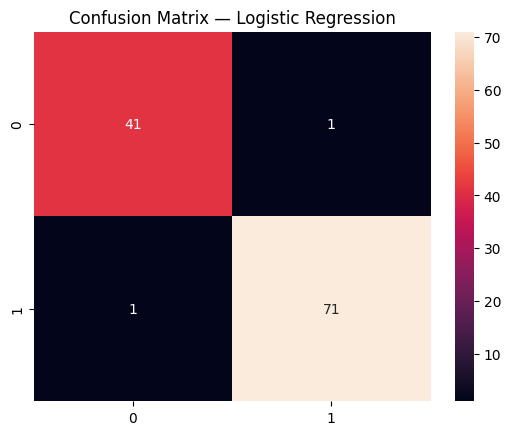

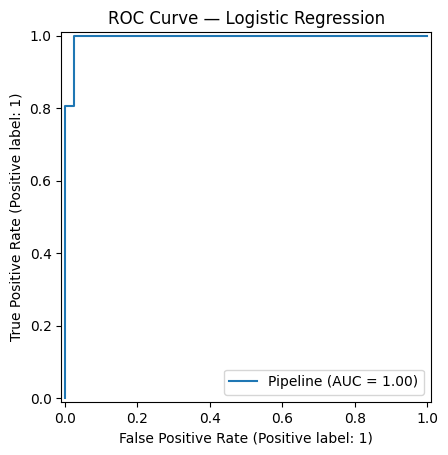

In [7]:
logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=500))
])

logreg_pipe.fit(X_train, y_train)
y_pred = logreg_pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix — Logistic Regression")
plt.show()

# ROC-AUC
RocCurveDisplay.from_estimator(logreg_pipe, X_test, y_test)
plt.title("ROC Curve — Logistic Regression")
plt.show()


In [8]:
models = {
    "LogisticRegression": Pipeline([("scaler", StandardScaler()), ("clf", LogisticRegression(max_iter=500))]),
    "SVM (RBF)": Pipeline([("scaler", StandardScaler()), ("clf", SVC(probability=True))]),
    "RandomForest": RandomForestClassifier(random_state=42)
}

for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)
    proba = mdl.predict_proba(X_test)[:,1] if hasattr(mdl, "predict_proba") else None

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1:", f1_score(y_test, preds))
    if proba is not None:
        print("ROC-AUC:", roc_auc_score(y_test, proba))



LogisticRegression
Accuracy: 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112
F1: 0.9861111111111112
ROC-AUC: 0.9953703703703703

SVM (RBF)
Accuracy: 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112
F1: 0.9861111111111112
ROC-AUC: 0.9950396825396826

RandomForest
Accuracy: 0.956140350877193
Precision: 0.958904109589041
Recall: 0.9722222222222222
F1: 0.9655172413793104
ROC-AUC: 0.9937169312169312


In [9]:
cv_scores = cross_val_score(logreg_pipe, X, y, cv=5, scoring="accuracy")
print("LogReg CV Accuracy:", cv_scores.mean().round(4), "±", cv_scores.std().round(4))


LogReg CV Accuracy: 0.9807 ± 0.0065


Best params: {'clf__C': 10, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



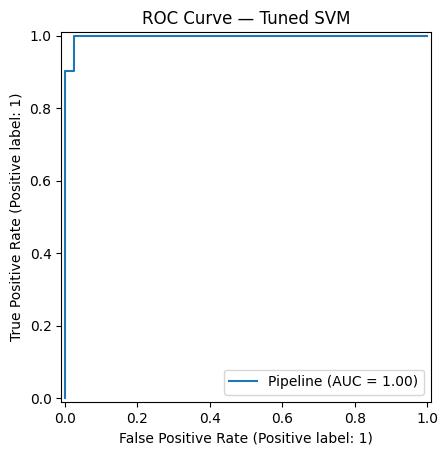

In [10]:
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(probability=True))
])

param_grid = {
    "clf__C": [0.1, 1, 10],
    "clf__gamma": ["scale", 0.01, 0.001],
    "clf__kernel": ["rbf"]
}

grid = GridSearchCV(svm_pipe, param_grid, cv=5, scoring="f1", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
best_svm = grid.best_estimator_
svm_preds = best_svm.predict(X_test)
print(classification_report(y_test, svm_preds))

RocCurveDisplay.from_estimator(best_svm, X_test, y_test)
plt.title("ROC Curve — Tuned SVM")
plt.show()


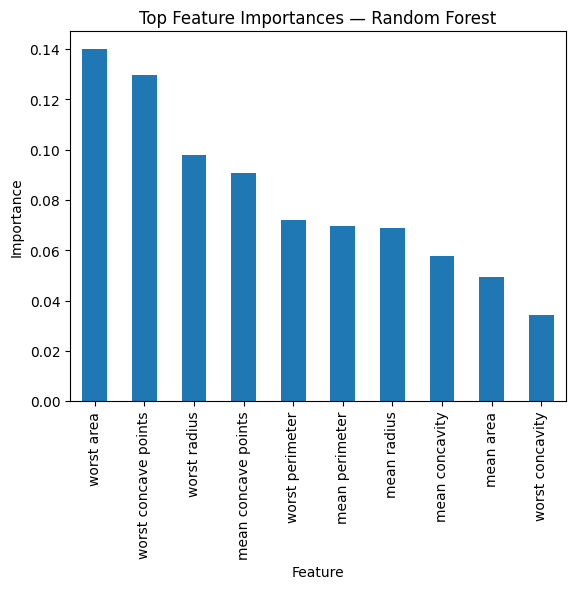

,0
worst area,0.140016
worst concave points,0.129530
worst radius,0.097696
mean concave points,0.090885
worst perimeter,0.072226
mean perimeter,0.069574
mean radius,0.068676
mean concavity,0.057638
mean area,0.049172
worst concavity,0.034340


In [11]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
imp.plot(kind="bar")
plt.title("Top Feature Importances — Random Forest")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

imp


In [12]:
import joblib

# Example: save tuned SVM pipeline (already includes scaler)
joblib.dump(best_svm, "breast_cancer_model_svm.pkl")

# Also save a simple info file
with open("model_readme.txt", "w") as f:
    f.write("Breast Cancer Detection — Tuned SVM pipeline (with StandardScaler)\n")
    f.write("Target: 0=malignant, 1=benign\n")
    f.write("Metrics are in the notebook.\n")


In [13]:
# Take one test sample and predict
sample = X_test.iloc[[0]]
print("True label:", y_test.iloc[0])
print("Predicted:", best_svm.predict(sample)[0])
if hasattr(best_svm, "predict_proba"):
    print("Probability (benign):", best_svm.predict_proba(sample)[0,1])


True label: 0
Predicted: 0
Probability (benign): 6.950146816118217e-06


In [15]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
data = load_breast_cancer()

# Convert to pandas DataFrame for easy viewing
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target column
df['target'] = data.target

# Show first 5 rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
